In [12]:
import pandas as pd 
import numpy as np
%matplotlib inline

## Model Interpretation with Skater

[Skater](https://github.com/datascienceinc/Skater) is a Python library for interpreting models from their output. While it can't confirm with any certainty what model is being used, or the specifics of how it's being implemented, it shows that with two common models age appears to be far and away the most important variable in determining scores.

In [3]:
ssl_df = pd.read_csv('data/Strategic_Subject_List.csv')
ssl_df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SSL_SCORE,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,...,RAW_HEAT_SCORE,STATUS_I,PRE_RAW_HEAT_SCORE,TRAP_FLAGS,SSL_FLAGS,LATITUDE,LONGITUDE,CENSUS_TRACT,COMMUNITY_AREA,LOCATION
0,500,20-30,0,1,4,1,1,1.0,1,M,...,0.14196,Y,14196,NaN,24.0,NaN,NaN,NaN,,NaN
1,500,20-30,0,9,1,1,0,1.0,0,M,...,0.14511,Y,14511,NaN,8.0,NaN,NaN,NaN,,NaN
2,500,less than 20,1,2,1,1,3,1.0,0,M,...,0.12982,Y,12982,NaN,8.0,NaN,NaN,NaN,,NaN
3,500,less than 20,1,1,4,1,0,1.6,1,M,...,0.13110,Y,13110,NaN,NaN,NaN,NaN,NaN,,NaN
4,500,less than 20,0,0,5,0,0,1.3,3,M,...,0.12874,Y,12874,NaN,NaN,NaN,NaN,NaN,,NaN


In [4]:
pred_vars = ['SSL_SCORE', 'PREDICTOR_RAT_AGE_AT_LATEST_ARREST', 'PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
             'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT', 'PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES', 'PREDICTOR_RAT_GANG_AFFILIATION',
             'PREDICTOR_RAT_NARCOTIC_ARRESTS', 'PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY', 'PREDICTOR_RAT_UUW_ARRESTS']

ssl_pred_df = ssl_df[pred_vars].copy()
# Removing the ~100 rows without an age
ssl_pred_df.dropna(subset=['PREDICTOR_RAT_AGE_AT_LATEST_ARREST'], inplace=True)
ssl_pred_df.head()

,SSL_SCORE,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS
0,500,20-30,0,1,4,1,1,1.0,1
1,500,20-30,0,9,1,1,0,1.0,0
2,500,less than 20,1,2,1,1,3,1.0,0
3,500,less than 20,1,1,4,1,0,1.6,1
4,500,less than 20,0,0,5,0,0,1.3,3


In [5]:
# Converting age to numeric
ssl_age_map = {
    'less than 20': 0,
    '20-30': 1,
    '30-40': 2,
    '40-50': 3,
    '50-60': 4,
    '60-70': 5,
    '70-80': 6
}
ssl_pred_df['AGE'] = ssl_pred_df['PREDICTOR_RAT_AGE_AT_LATEST_ARREST'].apply(lambda x: ssl_age_map.get(x))
ssl_pred_df.head()

,SSL_SCORE,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,AGE
0,500,20-30,0,1,4,1,1,1.0,1,1
1,500,20-30,0,9,1,1,0,1.0,0,1
2,500,less than 20,1,2,1,1,3,1.0,0,0
3,500,less than 20,1,1,4,1,0,1.6,1,0
4,500,less than 20,0,0,5,0,0,1.3,3,0


In [6]:
model_predictors = ['AGE', 'PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                    'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT', 'PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES', 
                    'PREDICTOR_RAT_GANG_AFFILIATION', 'PREDICTOR_RAT_NARCOTIC_ARRESTS', 
                    'PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY', 'PREDICTOR_RAT_UUW_ARRESTS']
target = 'SSL_SCORE'

In [7]:
from sklearn.ensemble import RandomForestRegressor
from skater.model import InMemoryModel

X = model_predictors
y = target

rr = RandomForestRegressor()
rr.fit(ssl_pred_df[X], ssl_pred_df[y])

model = InMemoryModel(rr.predict, examples=ssl_pred_df[X][:10])

In [8]:
from skater import Interpretation

interpreter = Interpretation(ssl_pred_df[X], feature_names=model_predictors)

In [9]:
interpreter.feature_importance.feature_importance(model)

PREDICTOR_RAT_UUW_ARRESTS                   0.006408
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS     0.008316
PREDICTOR_RAT_GANG_AFFILIATION              0.013652
PREDICTOR_RAT_NARCOTIC_ARRESTS              0.041557
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT     0.042538
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES      0.050046
PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY    0.095610
AGE                                         0.741873
dtype: float64

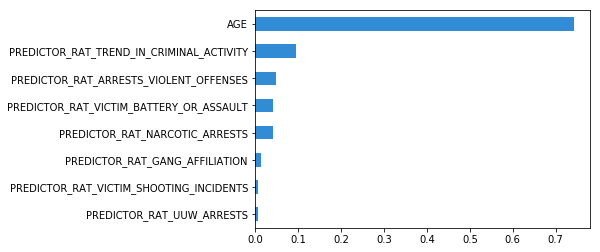

In [13]:
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=False)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(ssl_pred_df[X], ssl_pred_df[y])

gb_model = InMemoryModel(gb.predict, examples=ssl_pred_df[X][:10])

interpreter.feature_importance.feature_importance(gb_model)

PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS     0.008816
PREDICTOR_RAT_GANG_AFFILIATION              0.010376
PREDICTOR_RAT_UUW_ARRESTS                   0.010562
PREDICTOR_RAT_NARCOTIC_ARRESTS              0.037019
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT     0.041413
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES      0.045903
PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY    0.089635
AGE                                         0.756277
dtype: float64

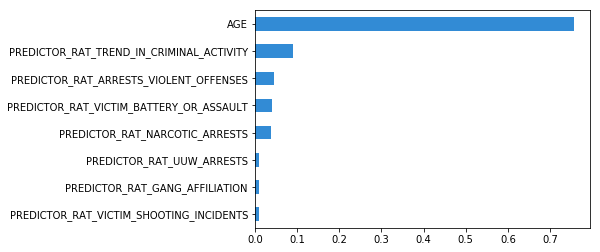

In [14]:
gb_plots = interpreter.feature_importance.plot_feature_importance(gb_model, ascending=False)